In [ ]:
from serialize_data import main
main('/home/paperspace/data/ms_coco/val2014/', 
     '/home/paperspace/data/ms_coco/captions_val2014.json',
     '/home/paperspace/data/ms_coco/instances_val2014.json',
     '/tmp/tfrecord')

In [ ]:
#### import json
import tqdm
import numpy as np

def load_json():
    s = open('/home/paperspace/data/ms_coco/captions_val2014.json').read()
    return json.loads(s)

In [ ]:
j = load_json()
d = {d['caption']: d['image_id'] for d in j['annotations']}
dd = {}
for caption, img_id in tqdm.tqdm(d.items()):
    try:
        dd[img_id].append(caption)
    except:
        dd[img_id] = []
        dd[img_id].append(caption)

In [ ]:
ddd = {}
eye = np.vstack([np.eye(256).astype('bool'), np.zeros(256)])
for k, v in tqdm.tqdm(dd.items()):
    ddd[k] = np.array([eye[
        np.pad([ord(c) for c in caption], 
               (0, 256-len(caption)), 
               mode='constant',
               constant_values=256)] for caption in v])

In [ ]:
zip(*sorted(dd.items()))

In [ ]:
np.vstack([np.eye(256), np.zeros(256)])[[0, 1, 1, 256]]

In [ ]:
import glob
imgs = glob.glob('/home/paperspace/data/ms_coco/val2014/*')

In [ ]:
np.array(list('hello')).astype('int')

In [ ]:
import tensorflow as tf
import time

In [ ]:
coord = tf.train.Coordinator()
inp = tf.train.input_producer(tf.random_normal(shape=(100,2))).dequeue()
with tf.Session() as sess:
    tf.train.start_queue_runners(sess=sess, coord=coord)
    while True:
        print(sess.run(inp))
        time.sleep(1)

In [ ]:
q = tf.train.input_producer([[1, 2], [3, 4]])

In [ ]:
tf.train.input_producer?

In [ ]:
json.loads(open('/home/paperspace/data/ms_coco/annotations/instances_val2014.json').read())

In [1]:
import tensorflow as tf
import tqdm
coord = tf.train.Coordinator()
reader = tf.TFRecordReader()
_, serialized_example = reader.read(tf.train.string_input_producer(
    ['/home/paperspace/data/ms_coco/train.tfrecord']))
feature = {'image': tf.FixedLenFeature([], tf.string),
           'caption': tf.FixedLenFeature([], tf.string),
           'class': tf.FixedLenFeature([], tf.int64)}
# Decode the record read by the reader
features = tf.parse_single_example(serialized_example, features=feature)

In [2]:
with tf.Session() as sess:
    tf.train.start_queue_runners(sess=sess, coord=coord)
    for i in tqdm.trange(1):
        d = sess.run(features)

100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Run call was cancelled


In [3]:
with tf.Session() as sess:
    rv = sess.run(tf.image.decode_jpeg(d['image']))

Populating the interactive namespace from numpy and matplotlib


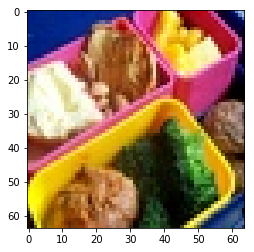

In [4]:
%pylab inline
imshow(rv)

In [5]:
d

{'caption': 'A bunch of trays that have different food.',
 'class': 55,
 'image': '\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00@\x00@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdef